In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [45]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [46]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [47]:
df.shape

(96453, 12)

In [48]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [131]:
df.duplicated().sum()

24

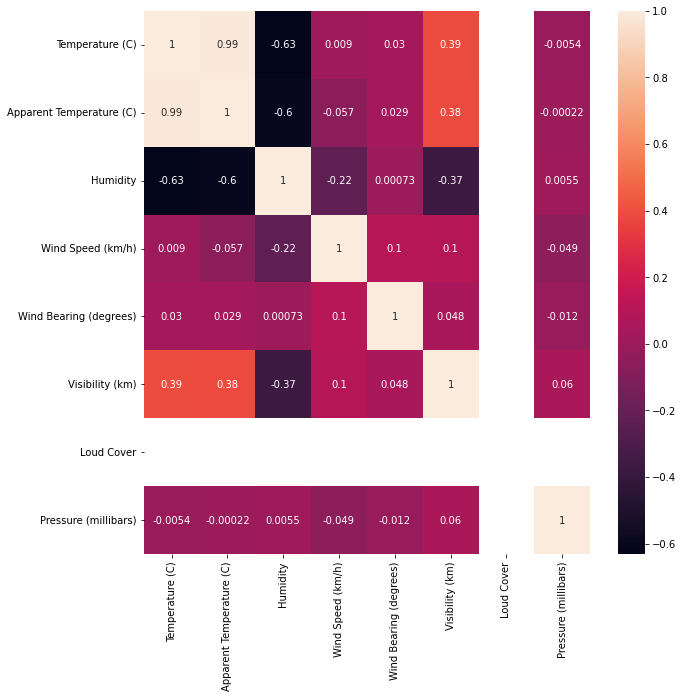

In [81]:
f,ax = plt.subplots( figsize= (10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [49]:
#Checking null values
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

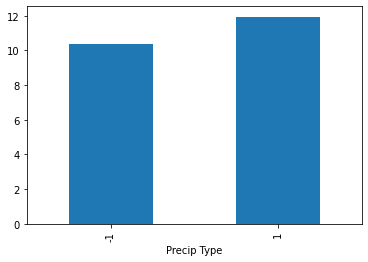

In [50]:
#Signiciant portion is null, corresponds to no precip at all
foo = df.copy()
foo['Precip Type'] = np.where(foo['Precip Type'].isnull(),-1,1)
foo.groupby('Precip Type')['Temperature (C)'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

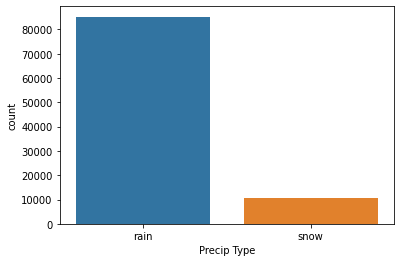

In [67]:
sns.countplot(x= df['Precip Type'])

In [54]:
cat_var = [f for f in df.columns if df[f].dtype == 'object']
for i in cat_var:
    print('########  ',i,'  #######')
    #print(df[i].value_counts())
    print('Unique value: ', len(df[i].unique()))

########   Formatted Date   #######
Unique value:  96429
########   Summary   #######
Unique value:  27
########   Precip Type   #######
Unique value:  3
########   Daily Summary   #######
Unique value:  214


<AxesSubplot:xlabel='count', ylabel='Summary'>

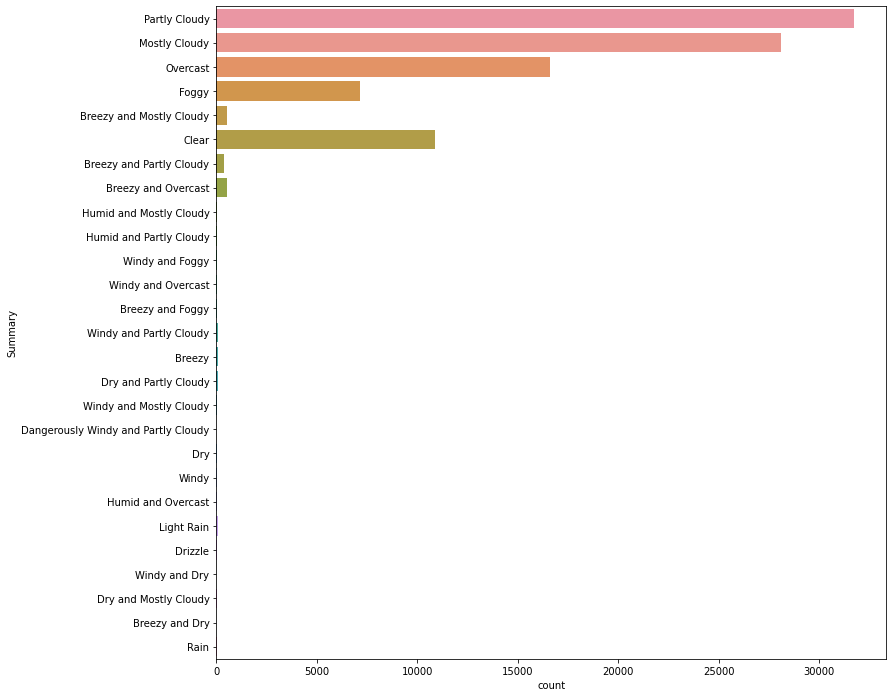

In [57]:
#There are many rare categories
f,ax = plt.subplots(figsize=(12,12))
sns.countplot(y=df['Summary'],ax=ax)

In [63]:
# Get the percent of the categories
l = []
total = df['Summary'].shape[0]
for i in df['Summary'].unique():
    c = df[df['Summary']==i].shape[0]
    print(i, ' ', c/total)

('Partly Cloudy', ' ', 0.32899961639347663)
('Mostly Cloudy', ' ', 0.2912713964314226)
('Overcast', ' ', 0.1720734450976123)
('Foggy', ' ', 0.07410863322032492)
('Breezy and Mostly Cloudy', ' ', 0.005349755839631738)
('Clear', ' ', 0.11290473080153028)
('Breezy and Partly Cloudy', ' ', 0.004001949135848548)
('Breezy and Overcast', ' ', 0.005474168766134801)
('Humid and Mostly Cloudy', ' ', 0.0004147097550102122)
('Humid and Partly Cloudy', ' ', 0.0001762516458793402)
('Windy and Foggy', ' ', 4.147097550102122e-05)
('Windy and Overcast', ' ', 0.00046654847438648876)
('Breezy and Foggy', ' ', 0.0003628710356339357)
('Windy and Partly Cloudy', ' ', 0.0006946388396421054)
('Breezy', ' ', 0.0005598581692637865)
('Dry and Partly Cloudy', ' ', 0.0008916259732719562)
('Windy and Mostly Cloudy', ' ', 0.0003628710356339357)
('Dangerously Windy and Partly Cloudy', ' ', 1.0367743875255306e-05)
('Dry', ' ', 0.0003525032917586804)
('Windy', ' ', 8.294195100204245e-05)
('Humid and Overcast', ' ', 7.2

In [80]:
# Partly Cloudy, Mostly Cloudy, Overcast, Foggy, Clear covering the 98 percent of 
# all categories
0.32899961639347663 +  0.2912713964314226+  0.1720734450976123 +0.11290473080153028+0.07410863322032492


0.9793578219443666

**Some weather conditions are present in the rare categories like 'Breezy and Partly Cloudy'. Breeze can me infered from wind speed. Should remove those ones.** 

In [77]:
foo = df['Summary'].copy()
for i in range(foo.shape[0]):
    
    if 'Mostly Cloudy' in foo[i]:
        foo[i] = 1
        
    elif 'Partly Cloudy' in foo[i]:
        foo[i] = 2
    
    elif 'Overcast' in foo[i]:
        foo[i] = 3
    
    elif 'Foggy' in foo[i]:
        foo[i] = 4
    
    elif 'Clear' in foo[i]:
        foo[i] = 5
    else:
        foo[i] = 0
    

<AxesSubplot:xlabel='Summary', ylabel='count'>

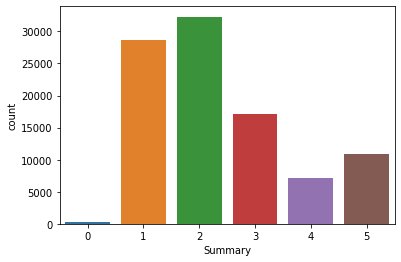

In [79]:
sns.countplot(x=foo)

In [83]:
# Daily Summary

len(df['Daily Summary'].unique())

214

In [90]:
# Get the percent of most common categories
l = []
k=0
total = df['Daily Summary'].shape[0]
for i in df['Daily Summary'].unique():
    c = df[df['Daily Summary']==i].shape[0]
    if(c/total > 0.001):
        k+= c/total
        print(i, ' ', c/total)
print('K: ',k)

Partly cloudy throughout the day.   0.1034804516189232
Mostly cloudy throughout the day.   0.2082361357345028
Foggy in the evening.   0.0024882585300612732
Overcast throughout the day.   0.030605579919753663
Partly cloudy until night.   0.06395861196644997
Mostly cloudy until night.   0.03208816729391517
Foggy starting overnight continuing until morning.   0.037075052097912974
Foggy in the morning.   0.04355489201994754
Partly cloudy until evening.   0.03408914186183944
Partly cloudy starting in the morning.   0.05374638424932351
Mostly cloudy starting overnight continuing until night.   0.004478865354110292
Mostly cloudy until evening.   0.010948337532269602
Partly cloudy starting in the morning continuing until evening.   0.029091889313966387
Partly cloudy starting in the afternoon.   0.01393424776834313
Partly cloudy starting overnight.   0.01492955118036764
Partly cloudy until morning.   0.003981213648098037
Partly cloudy starting overnight continuing until night.   0.0092065565612

**Numerical Variables**

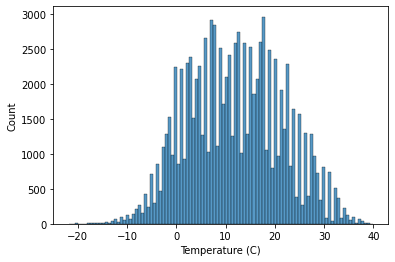

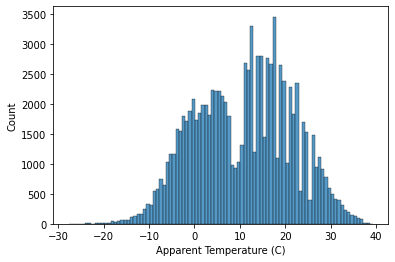

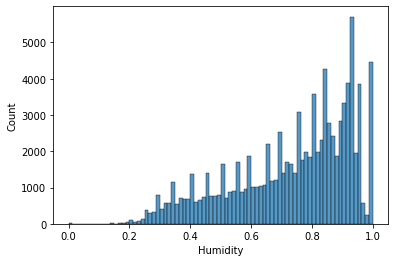

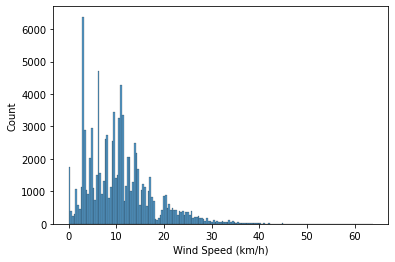

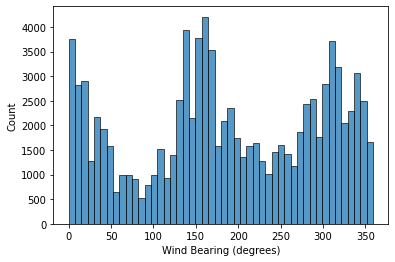

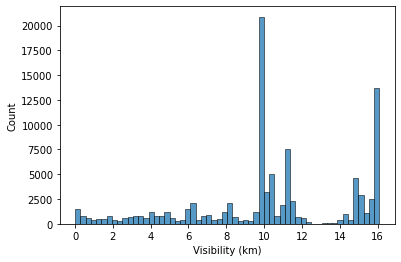

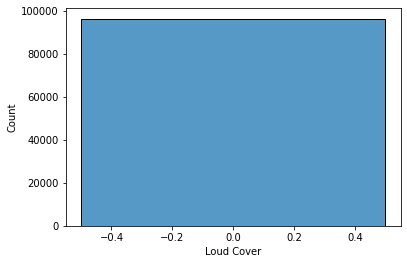

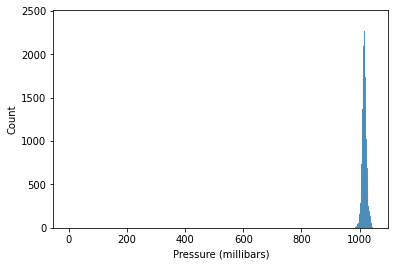

In [94]:
num_var = [f for f in df.columns if df[f].dtype!='object']

for i in num_var:
    sns.histplot(df[i])
    plt.show()

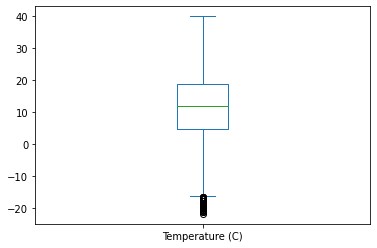

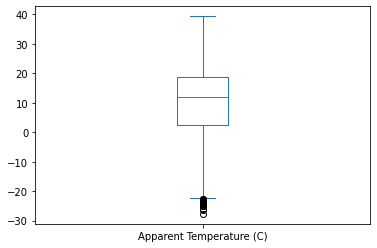

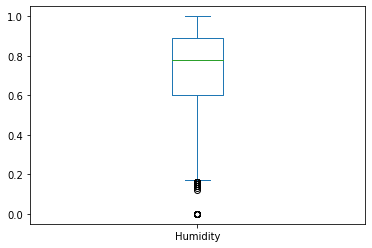

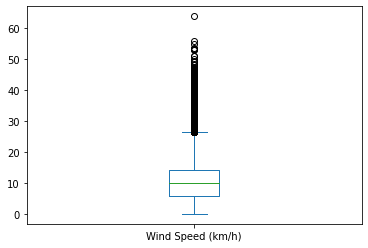

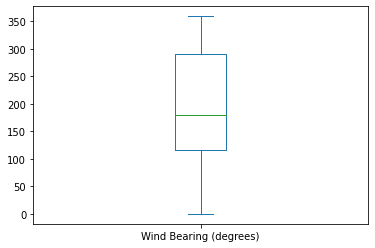

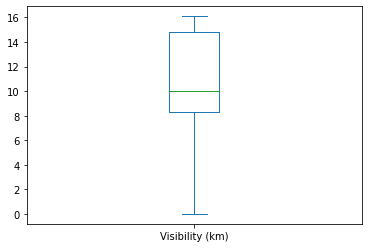

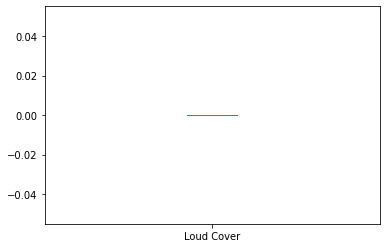

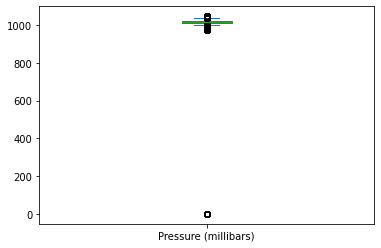

In [149]:
for i in num_var:
    df[i].plot.box()
    plt.show()

In [104]:
df['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [126]:
#Date
foo = df.copy()
foo['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [123]:
foo['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [127]:
foo['month'] = foo['Formatted Date'].dt.month
foo['year'] = foo['Formatted Date'].dt.year
foo['day'] = foo['Formatted Date'].dt.day

<AxesSubplot:xlabel='month', ylabel='day'>

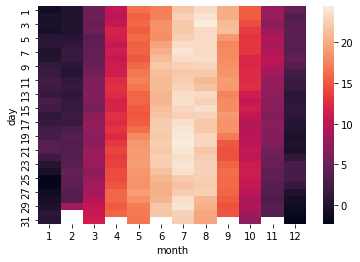

In [134]:
#Heatmap of mean temperature per days of the month
fo = foo[['month','day','Temperature (C)']]
fo = fo.groupby(['month','day']).mean()
fo
fo = pd.pivot_table(fo, values='Temperature (C)', index=['day'], columns='month')
#fo
sns.heatmap(fo)

<AxesSubplot:xlabel='year'>

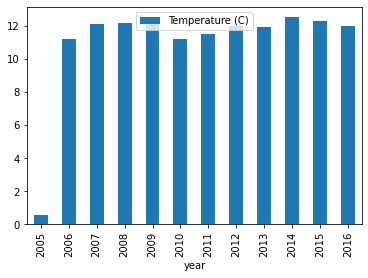

In [146]:
fo = foo[['year','Temperature (C)']]
fo = fo.groupby('year').mean()
fo.plot.bar()

In [148]:
foo['year'].value_counts()

2010    8784
2008    8784
2012    8784
2016    8783
2006    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
2005       1
Name: year, dtype: int64